# Plot qPCR of boosting export using modulators of secretion

# Introduction

## Imports

In [1]:
import sys
import os
import time

import numpy as np
import scipy
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Set output parameters

In [2]:
# Set pandas display options
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# Set plot display options
FONTSIZE = 8  # universal fontsize
params = {
    'font.size': FONTSIZE,
    'axes.titlesize': FONTSIZE,
    'axes.labelsize': FONTSIZE,
    'legend.fontsize': FONTSIZE,
    'xtick.labelsize': FONTSIZE,
    'ytick.labelsize': FONTSIZE,
    'font.family': "Helvetica",
    'mathtext.fontset': 'custom',
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 300
   }
mpl.rcParams.update(params)
sns.set_style("ticks", {'axes.grid' : False})

# Set plot output options
output_dir = "outs/qPCR_booster"
output_suffix = ""
output_formats = [".png", ".pdf"]

mpl.rc('savefig', dpi=300)

# Define convenience function for saving figures

savefig = True
savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0.1}

def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    if savefig:
        for output_format in output_formats:
            fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

In [3]:
# Report plot parameters
sns.plotting_context()

{'font.size': 8.0,
 'axes.labelsize': 8.0,
 'axes.titlesize': 8.0,
 'xtick.labelsize': 8.0,
 'ytick.labelsize': 8.0,
 'legend.fontsize': 8.0,
 'legend.title_fontsize': None,
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0}

# Load data

## Load qPCR data

In [4]:
infile = "../preprocessed_data/qPCR_data/qPCR_booster_Cq_plate1.csv"

cq_raw_plate1 = pd.read_csv(infile, header=0)

columns_to_drop = ["Unnamed: 0", "Well Note", "Set Point"]
cq_raw_plate1.drop(columns_to_drop, axis=1, inplace=True)
cq_raw_plate1.set_index("Well", inplace=True)

print(cq_raw_plate1.shape)
cq_raw_plate1.head()

(63, 12)


,Fluor,Target,Content,Sample,Biological Set Name,Cq,Cq Mean,Cq Std. Dev,Starting Quantity (SQ),Log Starting Quantity,SQ Mean,SQ Std. Dev
Well,,,,,,,,,,,,
A01,SYBR,mCherry,Unkn-01,16-39,NaN,18.116795,18.038663,0.071338,188587.520242,5.275513,199194.438226,9723.429023
A02,SYBR,mCherry,Unkn-02,16-40,NaN,27.251546,27.045275,0.215654,345.098222,2.537943,400.847210,60.021196
A03,SYBR,mCherry,Unkn-03,16-41,NaN,19.027260,19.098089,0.067386,100613.903177,5.002658,95883.786503,4474.458488
A04,SYBR,mCherry,Unkn-04,16-42,NaN,28.922967,29.172292,0.217984,108.902732,2.037039,92.400657,14.396367
A05,SYBR,mCherry,Unkn-05,16-43,NaN,20.066391,19.939771,0.119175,49118.316208,4.691243,53723.351868,4376.990612


In [5]:
infile = "../preprocessed_data/qPCR_data/qPCR_booster_Cq_plate2.csv"

cq_raw_plate2 = pd.read_csv(infile, header=0)

columns_to_drop = ["Unnamed: 0", "Well Note", "Set Point"]
cq_raw_plate2.drop(columns_to_drop, axis=1, inplace=True)
cq_raw_plate2.set_index("Well", inplace=True)

print(cq_raw_plate2.shape)
cq_raw_plate2.head()

(30, 12)


,Fluor,Target,Content,Sample,Biological Set Name,Cq,Cq Mean,Cq Std. Dev,Starting Quantity (SQ),Log Starting Quantity,SQ Mean,SQ Std. Dev
Well,,,,,,,,,,,,
A05,SYBR,mCherry,Unkn-05,17-5,NaN,33.620279,24.081386,17.600564,3.464558e+00,0.539648,4.075228e+08,7.058502e+08
A08,SYBR,mCherry,Unkn-08,17-8,NaN,19.521375,19.404724,0.152213,3.775137e+04,4.576933,4.090877e+04,4.196710e+03
A09,SYBR,mCherry,Unkn-09,17-9,NaN,29.317841,29.163530,0.156339,5.911127e+01,1.771670,6.567454e+01,6.774170e+00
B05,SYBR,mCherry,Unkn-05,17-5,NaN,3.770479,24.081386,17.600564,1.222568e+09,9.087273,4.075228e+08,7.058502e+08
B08,SYBR,mCherry,Unkn-08,17-8,NaN,19.232542,19.404724,0.152213,4.567110e+04,4.659641,4.090877e+04,4.196710e+03


## Load metadata

In [6]:
infile = "../preprocessed_data/qPCR_data/qPCR_booster_Cq_metadata.csv"
metadata = pd.read_csv(infile, index_col=0, header=0)
metadata = metadata.reset_index()
print(metadata.shape)
metadata.head()

(16, 7)


,Plate,Well,Sample,description,exporter,reporter,booster
0,3,A01,16-39,EPN24-MCP + mCherry-MS2x8 + 1250 ng CIT,pFH2.105 EPN24-MCP,pFH2.22 mCherry-MS2x8,1250 ng CIT
1,3,A02,16-40,EPN24-MCP + mCherry + 1250 ng CIT,pFH2.105 EPN24-MCP,pFH2.1 mCherry,1250 ng CIT
2,3,A03,16-41,EPN24-MCP + mCherry-MS2x8 + 1250 ng NEDD4L_del...,pFH2.105 EPN24-MCP,pFH2.22 mCherry-MS2x8,1250 ng NEDD4L_deltaC2
3,3,A04,16-42,EPN24-MCP + mCherry + 1250 ng NEDD4L_deltaC2,pFH2.105 EPN24-MCP,pFH2.1 mCherry,1250 ng NEDD4L_deltaC2
4,3,A05,16-43,EPN24-MCP + mCherry-MS2x8 + 1250 ng Cx43_S368A,pFH2.105 EPN24-MCP,pFH2.22 mCherry-MS2x8,1250 ng Cx43_S368A


## Set sample labels and colors

In [7]:
column_to_booster = {"16-39": "CIT",
                    "16-40": "CIT",
                    "16-41": "NEDD4L",
                    "16-42": "NEDD4L",
                    "16-43": "GJA1",
                    "16-44": "GJA1",
                    "16-45": "STEAP3",
                    "16-46": "STEAP3",
                    "16-47": "SDC4",
                    "16-48": "SDC4",
                    "16-49": "UGCG",
                    "16-50": "UGCG",
                    "16-29": "No DNA",
                    "17-5": "No DNA",
                    "17-8": "None",
                    "17-9": "None"}

In [8]:
column_to_export_tag_plus_or_minus = {"16-39": "+",
                    "16-40": "-",
                    "16-41": "+",
                    "16-42": "-",
                    "16-43": "+",
                    "16-44": "-",
                    "16-45": "+",
                    "16-46": "-",
                    "16-47": "+",
                    "16-48": "-",
                    "16-49": "+",
                    "16-50": "-",
                    "16-29": "",
                    "17-5": "",
                    "17-8": "+",
                    "17-9": "-"}

In [9]:
# Set well colors

color_exporter_Gag = "#31a354"
color_exporter_engineered = "#756bb1"

color_no_packaging_signal = "#737373"
color_no_RBD = "#bdbdbd"
color_no_exporter = "#f0f0f0"

color_no_packaging_signal = "#969696"
color_no_RBD = "#d9d9d9"
color_no_exporter = "#525252"

column_to_color = {"16-39": color_exporter_engineered,
                    "16-40": color_no_packaging_signal,
                    "16-41": color_exporter_engineered,
                    "16-42": color_no_packaging_signal,
                    "16-43": color_exporter_engineered,
                    "16-44": color_no_packaging_signal,
                    "16-45": color_exporter_engineered,
                    "16-46": color_no_packaging_signal,
                    "16-47": color_exporter_engineered,
                    "16-48": color_no_packaging_signal,
                    "16-49": color_exporter_engineered,
                    "16-50": color_no_packaging_signal,
                    "16-29": color_no_exporter,
                    "17-5": color_no_exporter,
                    "17-8": color_exporter_engineered,
                    "17-9": color_no_packaging_signal}

In [10]:
column_to_label = {"16-39": "Full system",
                    "16-40": "No export tag",
                    "16-41": "Full system",
                    "16-42": "No export tag",
                    "16-43": "Full system",
                    "16-44": "No export tag",
                    "16-45": "Full system",
                    "16-46": "No export tag",
                    "16-47": "Full system",
                    "16-48": "No export tag",
                    "16-49": "Full system",
                    "16-50": "No export tag",
                    "16-29": "No DNA",
                    "17-5": "No DNA",
                    "17-8": "Full system",
                    "17-9": "No export tag"}

# Preprocess data

## Merge plates

In [11]:
# Combine

# Add column indicating plate
cq_raw_plate1["Plate"] = "Plate1"
cq_raw_plate2["Plate"] = "Plate2"

# Reset index so that well becomes a column
cq_raw_plate1.reset_index(inplace=True)
cq_raw_plate2.reset_index(inplace=True)

# Concatenate dataframes
cq_raw = pd.concat([cq_raw_plate1, cq_raw_plate2])
print(cq_raw.shape)
cq_raw.head()

(93, 14)


,Well,Fluor,Target,Content,Sample,Biological Set Name,Cq,Cq Mean,Cq Std. Dev,Starting Quantity (SQ),Log Starting Quantity,SQ Mean,SQ Std. Dev,Plate
0,A01,SYBR,mCherry,Unkn-01,16-39,NaN,18.116795,18.038663,0.071338,188587.520242,5.275513,199194.438226,9723.429023,Plate1
1,A02,SYBR,mCherry,Unkn-02,16-40,NaN,27.251546,27.045275,0.215654,345.098222,2.537943,400.847210,60.021196,Plate1
2,A03,SYBR,mCherry,Unkn-03,16-41,NaN,19.027260,19.098089,0.067386,100613.903177,5.002658,95883.786503,4474.458488,Plate1
3,A04,SYBR,mCherry,Unkn-04,16-42,NaN,28.922967,29.172292,0.217984,108.902732,2.037039,92.400657,14.396367,Plate1
4,A05,SYBR,mCherry,Unkn-05,16-43,NaN,20.066391,19.939771,0.119175,49118.316208,4.691243,53723.351868,4376.990612,Plate1


## Map samples to metadata

In [12]:
# Merge Cq with metadata, using Sample and Biological Set Name as keys
quant = pd.merge(left=cq_raw, right=metadata, on="Sample")

## Calculate total starting molecules

In [13]:
# Calculate normalization for input volume
DILUTION_FACTORS = (1000/140) * (42/20) * (56/10) * (20/1) * (140/1000)

In [14]:
# Back-calculate input RNA molecules, given <100% efficiency of extraction, DNase, RT, as measured based on RNA standard

PROTOCOL_EFFICIENCY = 0.005957820738  # Efficiency of extraction, DNase, RT

In [15]:
# Calculate total RNA molecules in supernatant
quant["RNA molecules"] = quant["Starting Quantity (SQ)"] * DILUTION_FACTORS * (1/PROTOCOL_EFFICIENCY)

## Summarize replicates

In [16]:
# Calculate mean across replicates
quant_summary_temp = quant.groupby(["Sample"]).mean()

# Merge metadata with summary
cols_without_duplicates = list(metadata.columns.difference(quant_summary_temp.columns))
quant_summary = pd.merge(left=quant_summary_temp,
                         right=metadata[cols_without_duplicates],
                         on=["Sample"])
quant_summary.set_index("Sample", inplace=True)
quant_summary = quant_summary.drop(["Plate_y"], axis=1)  # drop duplicate columns
print(quant_summary.shape)
quant_summary.head()

(16, 15)


,Biological Set Name,Cq,Cq Mean,Cq Std. Dev,Starting Quantity (SQ),Log Starting Quantity,SQ Mean,SQ Std. Dev,RNA molecules,Plate,Well,booster,description,exporter,reporter
Sample,,,,,,,,,,,,,,,
16-29,NaN,33.653805,33.653805,0.398683,4.272856,0.619266,4.272856,1.250555,1.686818e+05,3,E12,NaN,No DNA,NaN,NaN
16-39,NaN,18.038663,18.038663,0.071338,199194.438226,5.298928,199194.438226,9723.429023,7.863703e+09,3,A01,1250 ng CIT,EPN24-MCP + mCherry-MS2x8 + 1250 ng CIT,pFH2.105 EPN24-MCP,pFH2.22 mCherry-MS2x8
16-40,NaN,27.045275,27.045275,0.215654,400.847210,2.599760,400.847210,60.021196,1.582445e+07,3,A02,1250 ng CIT,EPN24-MCP + mCherry + 1250 ng CIT,pFH2.105 EPN24-MCP,pFH2.1 mCherry
16-41,NaN,19.098089,19.098089,0.067386,95883.786503,4.981431,95883.786503,4474.458488,3.785254e+09,3,A03,1250 ng NEDD4L_deltaC2,EPN24-MCP + mCherry-MS2x8 + 1250 ng NEDD4L_del...,pFH2.105 EPN24-MCP,pFH2.22 mCherry-MS2x8
16-42,NaN,29.172292,29.172292,0.217984,92.400657,1.962319,92.400657,14.396367,3.647749e+06,3,A04,1250 ng NEDD4L_deltaC2,EPN24-MCP + mCherry + 1250 ng NEDD4L_deltaC2,pFH2.105 EPN24-MCP,pFH2.1 mCherry


# Visualize RNA export with candidate modulators

In [17]:
# Choose samples
columns_ordered = [ "16-39",
                    "16-40",
                    "16-41",
                    "16-42",
                    "16-43",
                    "16-44",
                    "16-45",
                    "16-46",
                    "16-47",
                    "16-48",
                    "16-49",
                    "16-50",
                    "17-8",
                    "17-9"]

In [18]:
# Get subset of data of summary across replicates of supernatant of selected wells
summary_subset = quant_summary.loc[columns_ordered]

# Set label
summary_subset["label"] = [column_to_label[col] for col in columns_ordered]

print(summary_subset.shape)
summary_subset.head()

(14, 16)


,Biological Set Name,Cq,Cq Mean,Cq Std. Dev,Starting Quantity (SQ),Log Starting Quantity,SQ Mean,SQ Std. Dev,RNA molecules,Plate,Well,booster,description,exporter,reporter,label
Sample,,,,,,,,,,,,,,,,
16-39,NaN,18.038663,18.038663,0.071338,199194.438226,5.298928,199194.438226,9723.429023,7.863703e+09,3,A01,1250 ng CIT,EPN24-MCP + mCherry-MS2x8 + 1250 ng CIT,pFH2.105 EPN24-MCP,pFH2.22 mCherry-MS2x8,Full system
16-40,NaN,27.045275,27.045275,0.215654,400.847210,2.599760,400.847210,60.021196,1.582445e+07,3,A02,1250 ng CIT,EPN24-MCP + mCherry + 1250 ng CIT,pFH2.105 EPN24-MCP,pFH2.1 mCherry,No export tag
16-41,NaN,19.098089,19.098089,0.067386,95883.786503,4.981431,95883.786503,4474.458488,3.785254e+09,3,A03,1250 ng NEDD4L_deltaC2,EPN24-MCP + mCherry-MS2x8 + 1250 ng NEDD4L_del...,pFH2.105 EPN24-MCP,pFH2.22 mCherry-MS2x8,Full system
16-42,NaN,29.172292,29.172292,0.217984,92.400657,1.962319,92.400657,14.396367,3.647749e+06,3,A04,1250 ng NEDD4L_deltaC2,EPN24-MCP + mCherry + 1250 ng NEDD4L_deltaC2,pFH2.105 EPN24-MCP,pFH2.1 mCherry,No export tag
16-43,NaN,19.939771,19.939771,0.119175,53723.351868,4.729190,53723.351868,4376.990612,2.120865e+09,3,A05,1250 ng Cx43_S368A,EPN24-MCP + mCherry-MS2x8 + 1250 ng Cx43_S368A,pFH2.105 EPN24-MCP,pFH2.22 mCherry-MS2x8,Full system


In [19]:
# Get subset of data of selected wells for every replicate 
selector = (quant["Sample"].isin(columns_ordered))
data = quant.loc[selector]

print(data.shape)
data.head()

(42, 21)


,Well_x,Fluor,Target,Content,Sample,Biological Set Name,Cq,Cq Mean,Cq Std. Dev,Starting Quantity (SQ),Log Starting Quantity,SQ Mean,SQ Std. Dev,Plate_x,Plate_y,Well_y,description,exporter,reporter,booster,RNA molecules
0,A01,SYBR,mCherry,Unkn-01,16-39,NaN,18.116795,18.038663,0.071338,188587.520242,5.275513,199194.438226,9723.429023,Plate1,3,A01,EPN24-MCP + mCherry-MS2x8 + 1250 ng CIT,pFH2.105 EPN24-MCP,pFH2.22 mCherry-MS2x8,1250 ng CIT,7.444968e+09
1,B01,SYBR,mCherry,Unkn-01,16-39,NaN,17.977001,18.038663,0.071338,207686.163225,5.317408,199194.438226,9723.429023,Plate1,3,A01,EPN24-MCP + mCherry-MS2x8 + 1250 ng CIT,pFH2.105 EPN24-MCP,pFH2.22 mCherry-MS2x8,1250 ng CIT,8.198935e+09
2,C01,SYBR,mCherry,Unkn-01,16-39,NaN,18.022191,18.038663,0.071338,201309.631211,5.303865,199194.438226,9723.429023,Plate1,3,A01,EPN24-MCP + mCherry-MS2x8 + 1250 ng CIT,pFH2.105 EPN24-MCP,pFH2.22 mCherry-MS2x8,1250 ng CIT,7.947205e+09
3,A02,SYBR,mCherry,Unkn-02,16-40,NaN,27.251546,27.045275,0.215654,345.098222,2.537943,400.847210,60.021196,Plate1,3,A02,EPN24-MCP + mCherry + 1250 ng CIT,pFH2.105 EPN24-MCP,pFH2.1 mCherry,1250 ng CIT,1.362362e+07
4,B02,SYBR,mCherry,Unkn-02,16-40,NaN,27.062953,27.045275,0.215654,393.062459,2.594462,400.847210,60.021196,Plate1,3,A02,EPN24-MCP + mCherry + 1250 ng CIT,pFH2.105 EPN24-MCP,pFH2.1 mCherry,1250 ng CIT,1.551713e+07


/scratch/resources/anaconda3/envs/RNA_export_magic/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


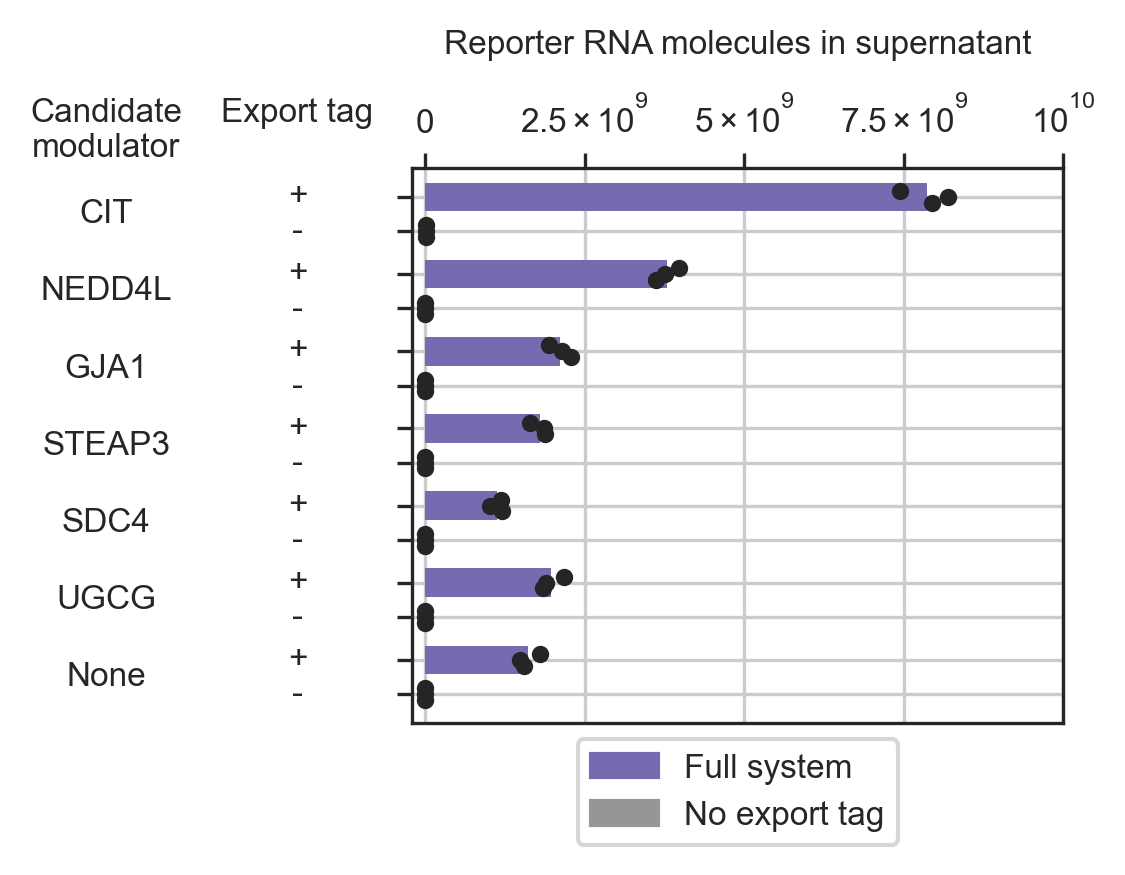

In [20]:
# Make simple plot that shows export using best system and comparison with wild-type Gag

field = "RNA molecules"

sns.set_style("ticks")

fig, ax = plt.subplots(1, 1, figsize=(2.8,2.4))

# Set axis scaling - must be done first so swarm plot dots do not overlap
ax.set_xlim(-2e8, 1e10)

# Get x positions of bars (numerical data)
x = summary_subset[field]

# Set colors
color = [column_to_color[col] for col in columns_ordered]

# Specify custom y positions to group bars
y_origin = 0
y_offset = 0.3
y_space = 0.75

y = [y_origin+1*y_offset, y_origin+3*y_offset,
     y_origin+3*y_offset+y_space, y_origin+5*y_offset+y_space,
     y_origin+5*y_offset+2*y_space, y_origin+7*y_offset+2*y_space,
     y_origin+7*y_offset+3*y_space, y_origin+9*y_offset+3*y_space,
     y_origin+9*y_offset+4*y_space, y_origin+11*y_offset+4*y_space,
     y_origin+11*y_offset+5*y_space, y_origin+13*y_offset+5*y_space,
     y_origin+13*y_offset+6*y_space, y_origin+15*y_offset+6*y_space]

# Plot bars showing summary of replicates (mean)
ax.barh(y=y, width=x, color=color, height=0.5, linewidth=0)

# Plot individual points as swarm (sort columns appropriately)
sample_to_rank = dict(zip(columns_ordered, range(len(columns_ordered))))
data["rank"] = [sample_to_rank[s] for s in data["Sample"]]
data = data.sort_values(by="rank")
x_swarm = data["RNA molecules"]
y_swarm = np.array([y[rank] for rank in data["rank"]])
y_offset3 = np.array([-0.1, 0, 0.1])  # jitter offsets to avoid overlaps
y_offset5 = np.array([-0.15, -0.075, 0, 0.075, 0.15])
y_offset6 = np.array([-0.15, -0.075, -0.025, 0.025, 0.075, 0.15])
y_swarm_offset = y_swarm + np.concatenate([np.tile(y_offset3, 14)])
ax.scatter(x_swarm, y_swarm_offset, color="#252525", s=10, zorder=10)

# Set axis aesthetics
ax.set_ylim(y[0]-0.5, y[-1]+0.5)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
ax.set_xlabel("Reporter RNA molecules in supernatant", labelpad=10)
ax.set_ylabel("")
ax.set_yticks(y)
ax.grid(True)

# Set xticks
xticks = [0, 2.5e9, 5e9, 7.5e9, 1e10]
ax.set_xticks(xticks)

# Set custom tick labels
xticklabels = [0, r"$2.5\times10^{9}$", r"$5\times10^{9}$", r"$7.5\times10^{9}$", r"$10^{10}$"]
ax.set_xticklabels(xticklabels, ha="center")

# Set custom tick labels
yticklabels = ""
ax.set_yticklabels(yticklabels, ha="left")

# Set custom tick text annotations
labels_exporter = [column_to_booster[col] for col in columns_ordered][::2]
y_labels_exporter = [(y[0] + y[1])/2, 
                     (y[2] + y[3])/2, 
                     (y[4] + y[5])/2,
                     (y[6] + y[7])/2,
                     (y[8] + y[9])/2, 
                     (y[10] + y[11])/2,
                     (y[12] + y[13])/2]

x_pos_text_exporter = -0.5e10
x_pos_text_export_tag = -0.2e10

for label, y_pos in zip(labels_exporter, y_labels_exporter):
    ax.text(x_pos_text_exporter, y_pos, label, ha="center", va="center", size=FONTSIZE)

labels_reporter = [column_to_export_tag_plus_or_minus[col] for col in columns_ordered]
for label, y_pos in zip(labels_reporter, y):
    ax.text(x_pos_text_export_tag, y_pos, label, ha="center", va="center", size=FONTSIZE)

# Set tick annotation column labels
ax.text(x_pos_text_exporter, y[0]-1.75, "Candidate\nmodulator", ha="center", va="top", size=FONTSIZE)
ax.text(x_pos_text_export_tag, y[0]-1.75, "Export tag", ha="center", va="top", size=FONTSIZE)

# Add legend
color_legend = [color_exporter_engineered,
                color_no_packaging_signal]
label_legend = ["Full system",
                "No export tag"]
patches = [mpl.patches.Patch(color=c) for c in color_legend]
ax.legend([patches[0], patches[1]], label_legend,
          handler_map={tuple: mpl.legend_handler.HandlerTuple(ndivide=None)},
          loc="upper center", bbox_to_anchor=(0.5, 0))

save_figure(fig, "barplot_boosters")

# Calculate statistical significance of difference

In [21]:
# CIT versus no booster

x = data.set_index("Sample").loc["16-39"]["Starting Quantity (SQ)"]
y = data.set_index("Sample").loc["17-8"]["Starting Quantity (SQ)"]

print("Sample 1")
print(x)
print("Mean:", np.mean(x))
print()

print("Sample 2")
print(y)
print("Mean:", np.mean(y))
print()

print("Ratio of means:", np.mean(x)/np.mean(y))
print("Percentage change:", (np.mean(x)/np.mean(y) - 1) * 100)
print()

print("Variances")
print("Sample 1:", np.var(x))
print("Sample 2:", np.var(y))
print("Ratio:", np.var(x)/np.var(y))
print()

print("Two sample T-test")
print(scipy.stats.ttest_ind(x, y, equal_var=True))

print()

# P < 1e-4

Sample 1
Sample
16-39    188587.520242
16-39    207686.163225
16-39    201309.631211
Name: Starting Quantity (SQ), dtype: float64
Mean: 199194.43822629834

Sample 2
Sample
17-8    45671.099950
17-8    37751.370173
17-8    39303.843923
Name: Starting Quantity (SQ), dtype: float64
Mean: 40908.77134879786

Ratio of means: 4.869235414770086
Percentage change: 386.92354147700854

Variances
Sample 1: 63030047.98101058
Sample 2: 11741582.645968756
Ratio: 5.368104954969654

Two sample T-test
Ttest_indResult(statistic=25.88738378160218, pvalue=1.3227890213247563e-05)



In [22]:
# NEDD4L versus no booster

x = data.set_index("Sample").loc["16-41"]["Starting Quantity (SQ)"]
y = data.set_index("Sample").loc["17-8"]["Starting Quantity (SQ)"]

print("Sample 1")
print(x)
print("Mean:", np.mean(x))
print()

print("Sample 2")
print(y)
print("Mean:", np.mean(y))
print()

print("Ratio of means:", np.mean(x)/np.mean(y))
print("Percentage change:", (np.mean(x)/np.mean(y) - 1) * 100)
print()

print("Variances")
print("Sample 1:", np.var(x))
print("Sample 2:", np.var(y))
print("Ratio:", np.var(x)/np.var(y))
print()

print("Two sample T-test")
print(scipy.stats.ttest_ind(x, y, equal_var=True))

print()

# P < 1e-4

Sample 1
Sample
16-41    100613.903177
16-41     95318.804817
16-41     91718.651515
Name: Starting Quantity (SQ), dtype: float64
Mean: 95883.78650270532

Sample 2
Sample
17-8    45671.099950
17-8    37751.370173
17-8    39303.843923
Name: Starting Quantity (SQ), dtype: float64
Mean: 40908.77134879786

Ratio of means: 2.3438442011659912
Percentage change: 134.38442011659913

Variances
Sample 1: 13347185.841339678
Sample 2: 11741582.645968756
Ratio: 1.1367450405778283

Two sample T-test
Ttest_indResult(statistic=15.521749977608776, pvalue=0.00010056935440641241)

